## *Classification of Bank Deposits: A Decision Tree Model for Yes/No Prediction*

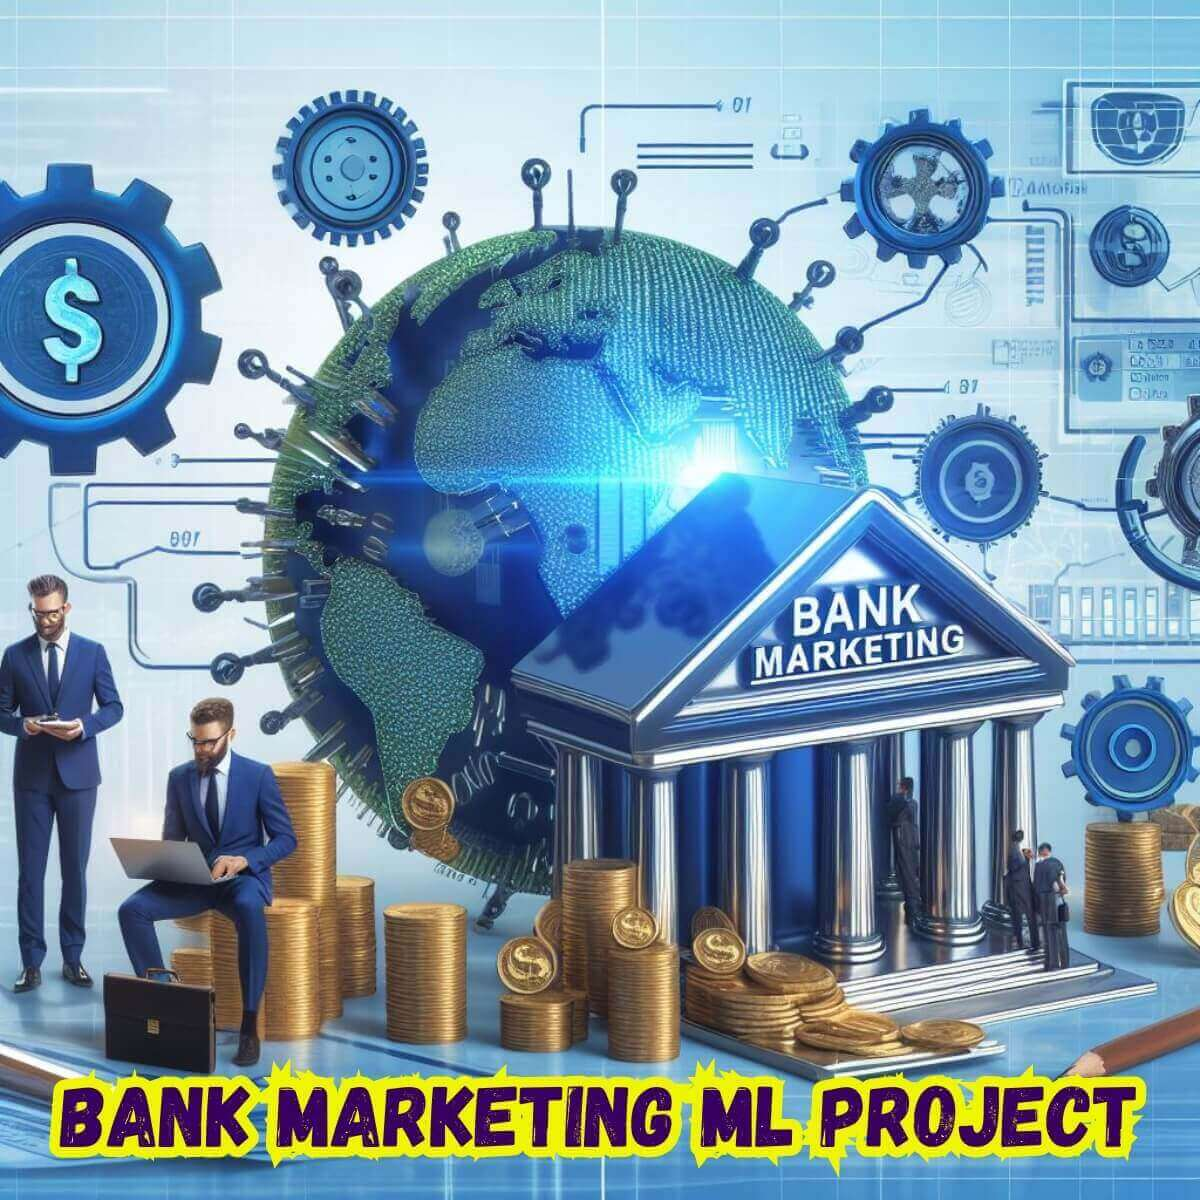

In [136]:
from IPython.display import Image

# Display the image with specified width and height
Image(r"C:\Users\Admin\Desktop\download.jpeg", width=700, height=200)

#### 📊 `Dataset Overview`

#### **Introduction to the Dataset**
This dataset focuses on **direct marketing campaigns** conducted by a **Portuguese banking institution**. The bank’s goal was to promote its `term deposit product` through phone calls to existing customers. A **term deposit** (or fixed deposit) is a savings account where customers lock in a set amount of money for a fixed period, earning higher interest rates than regular accounts. The money can't be withdrawn early without incurring penalties, making it ideal for secure, higher returns. This product is particularly beneficial for customers seeking stable, long-term savings.

## *A Decision Tree Model classifer*

### *Importing necessary libraries*


In [137]:
import pandas as pd        # Data manipulation
import numpy as np         # Numerical operations
import matplotlib.pyplot as plt  # Visualization
import seaborn as sns      # Advanced visualization
from sklearn.preprocessing import LabelEncoder    # For encoding categorical variables
from sklearn.model_selection import train_test_split  # Data splitting
from sklearn.tree import DecisionTreeClassifier       # Decision Tree model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # Evaluation metrics
from imblearn.over_sampling import SMOTE              # For handling imbalanced data

### *Load the data set*

In [138]:
# Load the dataset
Bank = pd.read_csv('bank.csv')

# Display the first few rows of the dataset
print("Dataset loaded successfully!")
Bank.head()


Dataset loaded successfully!


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


## *Explore the dataset*

In [ ]:
# exploring the datatype of each column
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


#### *Coloumn names*

In [140]:
# checking coloumuns of the data set
Bank.columns    

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

### *Handling missing values*

In [141]:
#Checking missing values
print(f'The missing values are; \n',Bank.isnull().sum())


The missing values are; 
 age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64


### *Milestone 1 : there is no missing values*

In [142]:
# Check data types of each column
print('Data types of each column:')
print(Bank.dtypes)

Data types of each column:
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object


#### *Checking duplicates*

In [ ]:
# Check for duplicates
duplicates = Bank.duplicated().sum()
print(f"Number of duplicate entries: {duplicates}")

Number of duplicate entries: 0


#### *Handling Outliers by lower bound and upper bound*

##### *Capping Outliers  Using IQR Method*

In [144]:
# Step 1: Calculate the first and third quartile
Q1 = np.percentile(Bank['balance'], 25)
Q3 = np.percentile(Bank['balance'], 75)

#Step 2: Calculate the interquartile range (IQR)
IQR = Q3 - Q1

In [145]:
# Step 3: Calculate the lower and upper bound

lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

In [146]:
# Step 5: Print the lower and upper bounds
print("----------------------------------------")
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("----------------------------------------")

----------------------------------------
Lower Bound: -2257.0
Upper Bound: 4087.0
----------------------------------------


In [147]:
# Step 6: Identify and remove the outliers
Bank_data =   Bank[(Bank['balance'] >= lower_bound) & ( Bank['balance'] <= upper_bound)]

# Step 7: Print the data without outliers
print("Data after removing outliers:")
Bank_data .head()

Data after removing outliers:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


### *Descriptive Statistics*

##### *Show summary statistics of the numerical columns*

In [148]:
# get quick peek of the dataset
Bank_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000,10107.000000
mean,40.897596,809.882557,15.593945,368.650836,2.517364,51.309291,0.816068
std,11.736322,997.790839,8.441658,346.480771,2.707008,109.635799,2.243602
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,94.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,443.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1228.000000,22.000000,489.500000,3.000000,2.000000,1.000000
max,95.000000,4087.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### *Data Preprocessing*

In [149]:
# Check for unique values in the target column ('deposit')
print('Unique values in the target column (deposit):')
print(Bank['deposit'].value_counts())

Unique values in the target column (deposit):
deposit
no     5873
yes    5289
Name: count, dtype: int64


#### *Encoding Categorical Features*

In [150]:
# List of categorical columns
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Print unique values for each categorical column
for col in categorical_columns:
    unique_values =     Bank_data[col].unique()
    print(f"Unique values in '{col}': {unique_values}")

Unique values in 'job': ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
Unique values in 'marital': ['married' 'single' 'divorced']
Unique values in 'education': ['secondary' 'tertiary' 'primary' 'unknown']
Unique values in 'default': ['no' 'yes']
Unique values in 'housing': ['yes' 'no']
Unique values in 'loan': ['no' 'yes']
Unique values in 'contact': ['unknown' 'cellular' 'telephone']
Unique values in 'month': ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
Unique values in 'poutcome': ['unknown' 'other' 'failure' 'success']
Unique values in 'deposit': ['yes' 'no']


In [151]:
# Suppress the SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

In [152]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to encode
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

# Encode categorical columns
for col in categorical_columns:
    Bank_data[col] = label_encoder.fit_transform(Bank_data[col])

# Check the first few rows after encoding
Bank_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


#### *Encoding Mappings for Categorical Variables*
---
- **job**: {'admin.': 0, 'blue-collar': 1, 'entrepreneur': 2, 'housemaid': 3, 'management': 4, 'retired': 5, 'self-employed': 6, 'services': 7, 'student': 8, 'technician': 9, 'unemployed': 10, 'unknown': 11}
- **marital**: {'divorced': 0, 'married': 1, 'single': 2}
- **education**: {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3}
- **default**: {'no': 0, 'yes': 1}
- **housing**: {'no': 0, 'yes': 1}
- **loan**: {'no': 0, 'yes': 1}
- **contact**: {'cellular': 0, 'telephone': 1, 'unknown': 2}
- **month**: {'apr': 0, 'aug': 1, 'dec': 2, 'feb': 3, 'jan': 4, 'jul': 5, 'jun': 6, 'mar': 7, 'may': 8, 'nov': 9, 'oct': 10, 'sep': 11}
- **poutcome**: {'failure': 0, 'nonexistent': 1, 'success': 2}
- **deposit**: {'no': 0, 'yes': 1}

---
